In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import torch
import torch.nn as nn
import torchvision.models as models
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from torchvision import transforms
import pandas as pd
from PIL import Image
import os

In [5]:
folder_path = '/content/drive/My Drive/video_anomaly_detection_frames/20251204_223047/'
images = []
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        images.append(img)

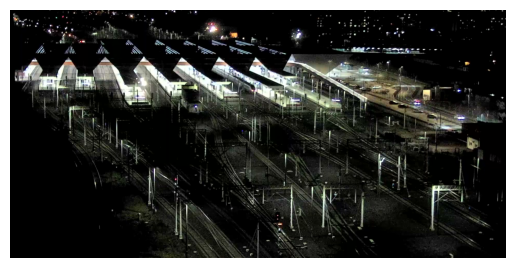

In [15]:
plt.imshow(images[0])
plt.axis('off')
plt.show()

In [17]:
# pip install img2vec-pytorch

In [6]:
from img2vec_pytorch import Img2Vec
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def encode_and_do_pca_all(encoder, images):
    vectors = []
    images = images[:50]
    for img in images:
        vec = encoder.get_vec(img)
        vectors.append(vec)

    vectors = np.vstack(vectors)
    print("Vector shape:", vectors.shape)

    pca = PCA(n_components=2)
    vectors_reduced = pca.fit_transform(vectors)

    plt.figure(figsize=(6,6))
    plt.scatter(vectors_reduced[:, 0], vectors_reduced[:, 1], color='blue')
    plt.title('PCA analysis of all images')
    plt.show()

Vector shape: (50, 512)


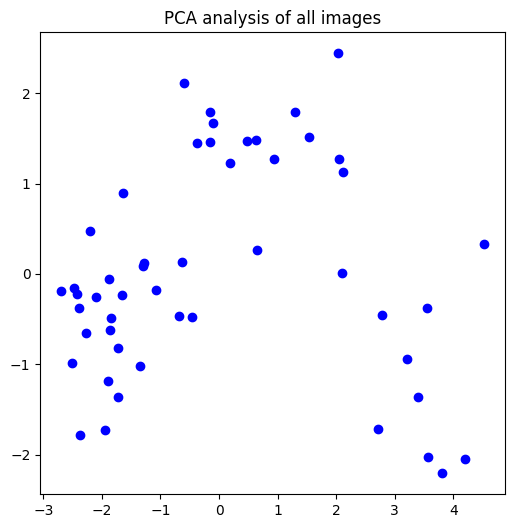

In [7]:
resnet18 = Img2Vec(model='resnet18', cuda=False)
encode_and_do_pca_all(resnet18, images)

Vector shape: (50, 512)


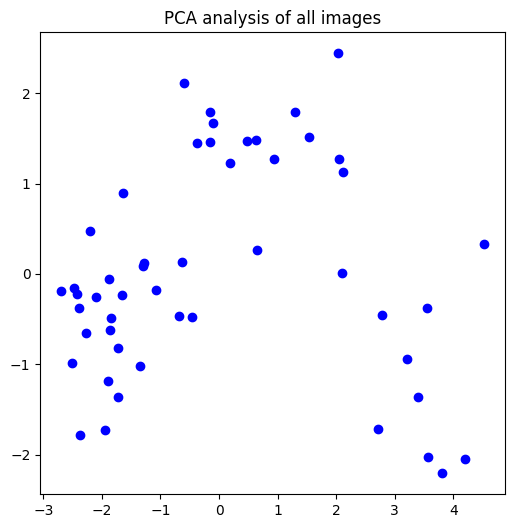

In [8]:
resnet18 = Img2Vec(model='resnet18',cuda=False)
encode_and_do_pca_all(resnet18,images)

Downloading: "https://download.pytorch.org/models/resnet152-f82ba261.pth" to /root/.cache/torch/hub/checkpoints/resnet152-f82ba261.pth


100%|██████████| 230M/230M [00:01<00:00, 160MB/s]


Vector shape: (50, 2048)


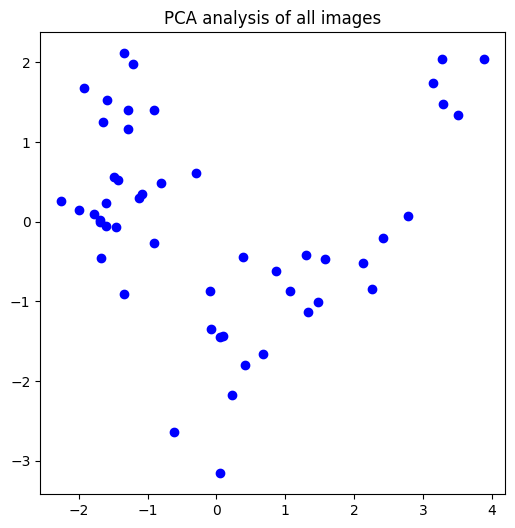

In [9]:
resnet152 = Img2Vec(model='resnet152',cuda=False)
encode_and_do_pca_all(resnet152,images)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 161MB/s]


Vector shape: (50, 4096)


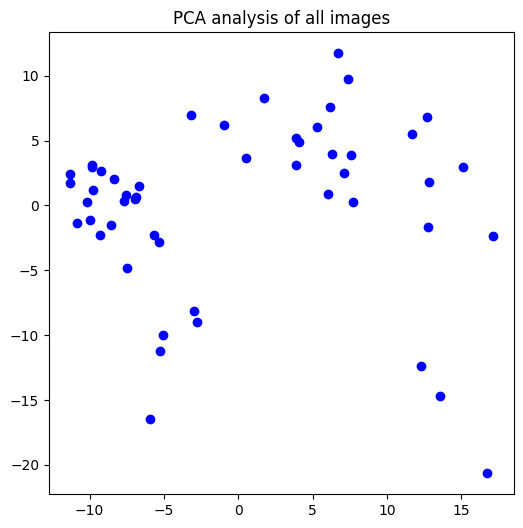

In [10]:
alexnet = Img2Vec(model='alexnet',cuda=False)
encode_and_do_pca_all(alexnet,images)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


100%|██████████| 548M/548M [00:07<00:00, 73.2MB/s]


Vector shape: (50, 4096)


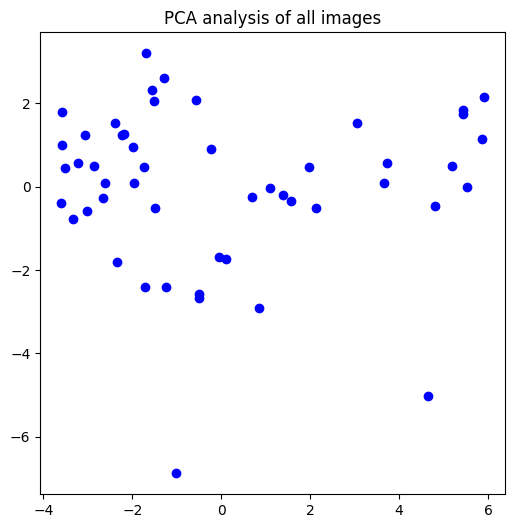

In [11]:
vgg19 = Img2Vec(model='vgg19',cuda=False)
encode_and_do_pca_all(vgg19,images)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


100%|██████████| 77.4M/77.4M [00:00<00:00, 163MB/s]


Vector shape: (50, 1920)


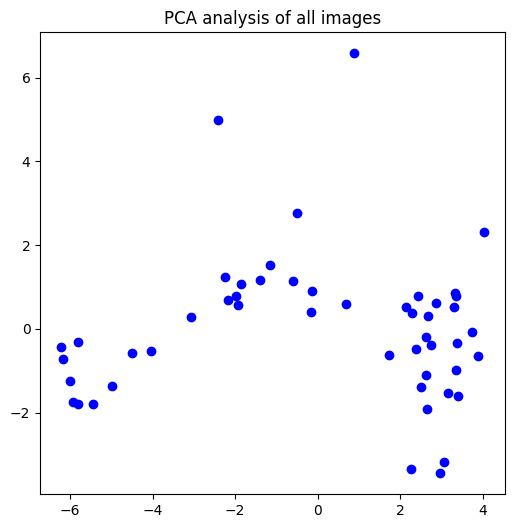

In [12]:
densenet201 = Img2Vec(model='densenet201',cuda=False)
encode_and_do_pca_all(densenet201,images)

Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-c5b4e57e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b7_lukemelas-c5b4e57e.pth


100%|██████████| 255M/255M [00:03<00:00, 87.0MB/s]


Vector shape: (50, 2560)


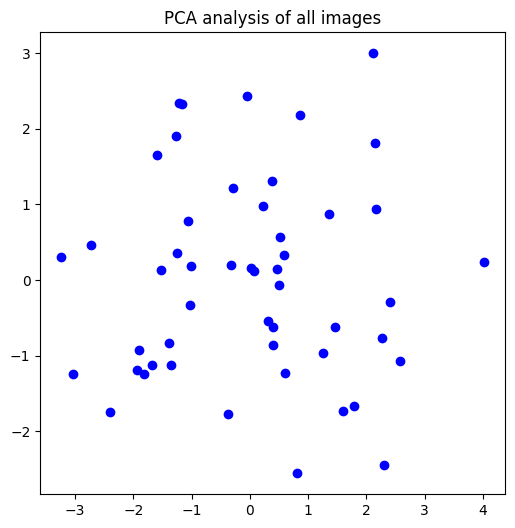

In [13]:
efficientnetb7 = Img2Vec(model='efficientnet_b7',cuda=False)
encode_and_do_pca_all(efficientnetb7,images)

In [14]:
import timm

In [15]:
class DinoExtractor:
    def __init__(self):
        self.model = timm.create_model('vit_small_patch16_224_dino', pretrained=True,)
        self.model.reset_classifier(0)
        self.model.eval()

    def get_vec(self, img):
        data_config = timm.data.resolve_model_data_config(self.model)
        transforms = timm.data.create_transform(**data_config, is_training=False)

        with torch.no_grad():
            features = self.model.forward_features(transforms(img).unsqueeze(0))
            output = self.model.forward_head(features, pre_logits=True)

        return output

/usr/local/lib/python3.12/dist-packages/timm/models/_factory.py:138: UserWarning: Mapping deprecated model name vit_small_patch16_224_dino to current vit_small_patch16_224.dino.
  model = create_fn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/86.7M [00:00<?, ?B/s]

Vector shape: (50, 384)


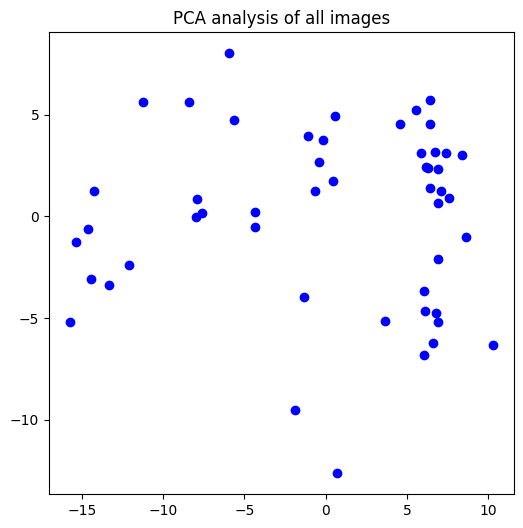

In [16]:
dino = DinoExtractor()
encode_and_do_pca_all(dino, images)